In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_csv("../outputs/medicines_cleaned.csv")
print(f"Loaded {len(df)} cleaned medicines")
df[["name", "composition_clean"]].head()


Loaded 249668 cleaned medicines


,name,composition_clean
0,Augmentin 625 Duo Tablet,amoxycillin clavulanic acid
1,Azithral 500 Tablet,azithromycin
2,Ascoril LS Syrup,ambroxol levosalbutamol
3,Allegra 120mg Tablet,fexofenadine
4,Avil 25 Tablet,pheniramine


In [6]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["composition_clean"])

dense_matrix = tfidf_matrix.toarray().astype("float32")
print(f"TF-IDF matrix shape: {dense_matrix.shape}")


TF-IDF matrix shape: (249668, 1885)


In [9]:
import faiss
faiss.normalize_L2(dense_matrix)

index = faiss.IndexFlatIP(dense_matrix.shape[1])
index.add(dense_matrix)

k = 6
distances, indices = index.search(dense_matrix, k)

print("FAISS index built and queried successfully.")


FAISS index built and queried successfully.


In [10]:
substitutes = []

for i in range(len(df)):
    similar_idxs = indices[i][1:]  
    similar_names = df.iloc[similar_idxs]["name"].tolist()
    substitutes.append(", ".join(similar_names) if similar_names else "No similar alternatives")

df["substitute"] = substitutes
df["num_substitutes"] = [len(s.split(",")) for s in substitutes]

df[["name", "substitute", "num_substitutes"]].head()


,name,substitute,num_substitutes
0,Augmentin 625 Duo Tablet,"Augmentin 1000 Duo Tablet, Augmentin DDS Suspe...",5
1,Azithral 500 Tablet,"Azee 200mg Dry Syrup, Azicip 500 Tablet, Azith...",5
2,Ascoril LS Syrup,"Asthalin AX Syrup, Ambrodil-LX Syrup, Asthakin...",5
3,Allegra 120mg Tablet,"Air 180 Tablet, Alrgee 120mg Tablet, Allegra S...",5
4,Avil 25 Tablet,"Delcuf D Syrup, Alergipar 10mg Injection, Avil...",5


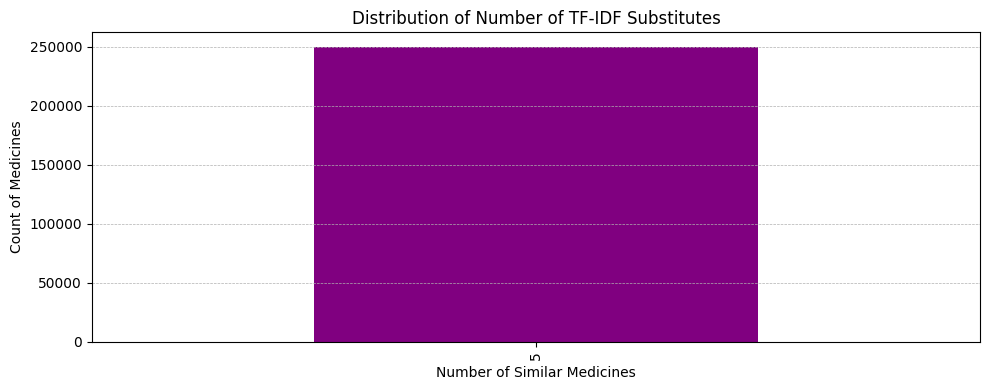

In [11]:
plt.figure(figsize=(10, 4))
df["num_substitutes"].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Distribution of Number of TF-IDF Substitutes")
plt.xlabel("Number of Similar Medicines")
plt.ylabel("Count of Medicines")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [14]:

df_small = df[["name", "composition_clean", "substitute"]].copy()
df_small.to_csv("../outputs/medicine_comp_substitue.csv", index=False)

print("Substitutes saved to outputs/")


Substitutes saved to outputs/
